In [2]:
file = open("moscow.dat","r") 
lines = file.readlines()
size = len(lines)


In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
year = np.zeros(size)
month = np.zeros(size)
day = np.zeros(size)
t_min = np.zeros(size)
t_mean = np.zeros(size)
t_max = np.zeros(size)
tot_prec = np.zeros(size)
numbers = np.zeros(size)
for i in range(152, size):
    numbers[i - 152] = i - 151
    ar = lines[i].split()
    year[i - 152] = ar[1]
    month[i - 152] = ar[2]
    day[i - 152] = ar[3]
    t_min[i - 152] = ar[5]
    t_mean[i - 152] = ar[7]
    if (i>=345):
        t_max[i - 152] = ar[9]
        tot_prec[i - 152] = ar[11]
    else:
        t_max[i - 152] = 9
        tot_prec[i - 152] = ar[10] 


In [5]:
import csv
new = open("moscow'.csv", "wb")
wrtr = csv.writer(new)
head = 'No','Year', 'Month', 'Day', 'T_min', 'T_mean', 'T_max', 'Total precipitation'
wrtr.writerow(head)
for i in range(size - 151):
    row = numbers[i],year[i], month[i], day[i], t_min[i],t_mean[i], t_max[i],tot_prec[i]
    wrtr.writerow(row)
new.close()

In [6]:
import pandas as pd
import xlsxwriter
df = pd.DataFrame({'No' : numbers, 'Year' : year, 'Month': month, 'Day' : day, 'T_min': t_min, 'T_mean': t_mean, 'T_max': t_max, 'Total precipitation' : tot_prec})
writer = pd.ExcelWriter('precipitation.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

writer.close()




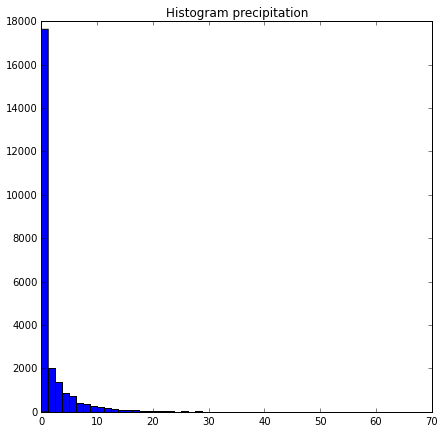

In [7]:
plt.figure(figsize = (7,7))
plt.title("Histogram precipitation")
plt.hist(tot_prec, bins = 50)
plt.show()

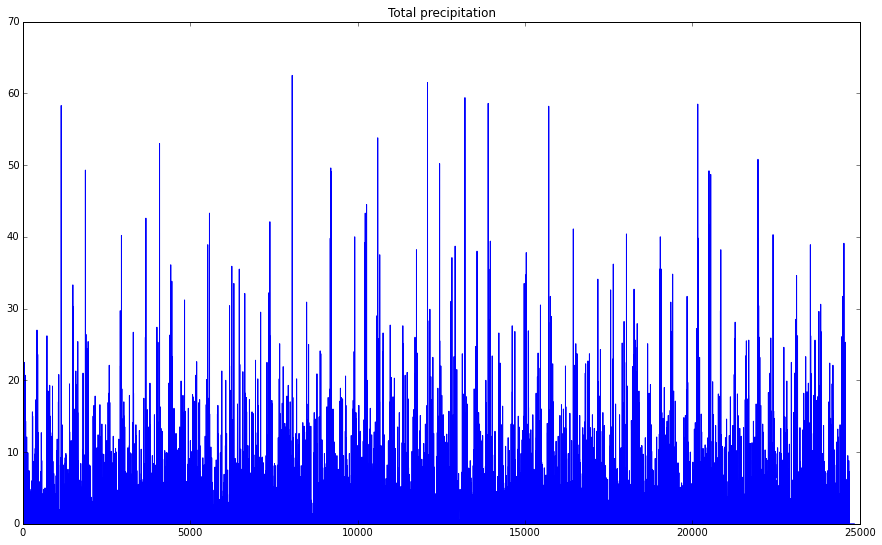

In [8]:
plt.figure(figsize = (15,9))
plt.title("Total precipitation")
plt.plot(tot_prec)

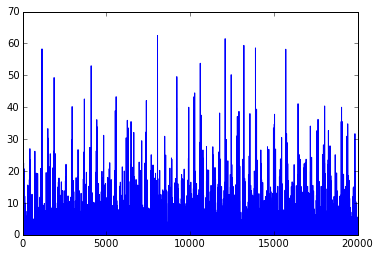

In [14]:
x_train = numbers[:20000]
y_train = tot_prec[:20000]
plt.plot(x_train,y_train)

In [15]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

clf.fit(x_train.reshape(len(x_train),1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
x_test = numbers[20001:]
predicted = clf.predict(x_test.reshape(len(x_test),1))
expected = tot_prec[20001:]

RMS: 4.3175582039


C:\Users\user\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


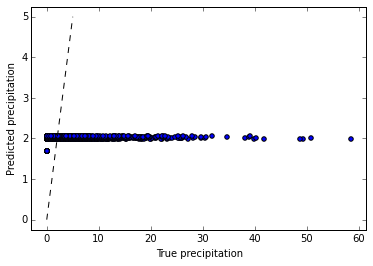

In [17]:
plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
print "RMS:", np.sqrt(np.mean((predicted - expected) ** 2))

In [18]:
from sklearn import linear_model
regr = linear_model.Ridge(alpha=.9)
regr.fit(x_train.reshape(len(x_train),1), y_train )

Ridge(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [19]:
predicted_ridge = regr.predict(x_test.reshape(len(x_test),1))

RMS: 4.3175582039


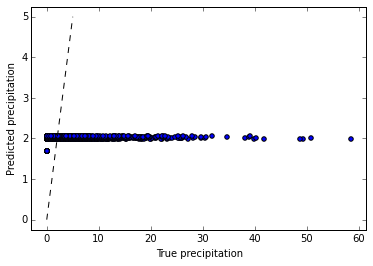

In [20]:
plt.scatter(expected, predicted_ridge)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
print "RMS:", np.sqrt(np.mean((predicted_ridge - expected) ** 2))

In [21]:
from sklearn.cross_validation import train_test_split
test_size = 0.4
xtrain, xtest, ytrain, ytest = train_test_split(numbers[:366], tot_prec[:366], test_size=test_size)

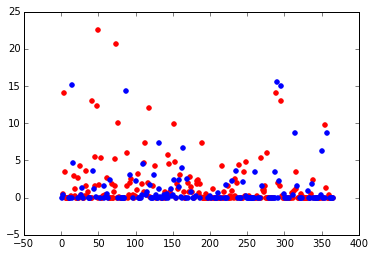

In [22]:
plt.scatter(xtrain, ytrain, color='red')
plt.scatter(xtest, ytest, color='blue')

In [23]:
def compute_error(x, y, p):
    yfit = np.polyval(p, x)
    return np.sqrt(np.mean((y - yfit) ** 2))

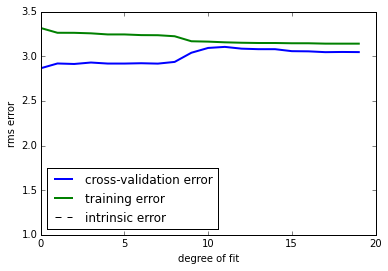

In [24]:
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

degrees = np.arange(20)
train_err = np.zeros(len(degrees))
validation_err = np.zeros(len(degrees))
error = 1.0

for i, d in enumerate(degrees):
    p = np.polyfit(xtrain, ytrain, d)

    train_err[i] = compute_error(xtrain, ytrain, p)
    validation_err[i] = compute_error(xtest, ytest, p)
    
fig, ax = plt.subplots()

ax.plot(degrees, validation_err, lw=2, label = 'cross-validation error')
ax.plot(degrees, train_err, lw=2, label = 'training error')
ax.plot([0, 20], [error, error], '--k', label='intrinsic error')

ax.legend(loc=0)
ax.set_xlabel('degree of fit')
ax.set_ylabel('rms error')

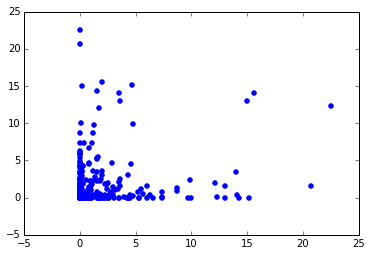

In [26]:
ss = len(tot_prec)
yt = tot_prec[1:366]
yt_1=tot_prec[:365]
plt.scatter(yt, yt_1, color='blue')